In [2]:
import numpy as np
import concrete.numpy as cnp
from time import time

def hamming_distance(x, y, z) -> int:
    one = x & z
    two = y & z
    return np.sum(one ^ two)

class HammingDistance:
    def __init__(self, input_shape, input_max_value) -> None:
        self.inputset = [
            (
                np.random.randint(
                    0, input_max_value + 1, size=input_shape, dtype=np.int64
                ),
                np.random.randint(
                    0, input_max_value + 1, size=input_shape, dtype=np.int64
                ),
                np.random.randint(
                    0, input_max_value + 1, size=input_shape, dtype=np.int64
                ),
            )
            for _ in range(1000)
        ]

        self.configuration = cnp.Configuration(
            enable_unsafe_features=True,
            use_insecure_key_cache=True,
            insecure_key_cache_location=".keys",
        )
        
        self.compiler = cnp.Compiler(
            hamming_distance, {"x": "encrypted", "y": "encrypted", "z": "encrypted"}
        )
        
        self.circuit = self.compiler.compile(self.inputset, self.configuration)
        
        
    def test(self):
        from time import time
        start = time()
        fhe_result = self.circuit.encrypt_run_decrypt(*self.inputset[0])
        clear_result = hamming_distance(*self.inputset[0])
        end = time()
        assert fhe_result == clear_result
        return end - start

In [ ]:
from datetime import datetime

stats_8 = {}
cases = [4, 8, 16, 32, 64, 128, 256, 512, 1024, 1536]
for case in cases:
    print(f'[{datetime.now().time().strftime("%H:%M:%S")}]: Hamming distance for {case}')
    hd = HammingDistance(case, 1)
    t = hd.test()
    stats_8[case] = t
    print(f'[{datetime.now().time().strftime("%H:%M:%S")}]: Hamming distance for {case} took {t} seconds')

## After exeucting we got the following result

In [16]:
stats_8 = {
    4: 95,
    8: 143,
    # 16: 1124 most probably, the computer went to sleep mode
    32: 647,
    # 64: 20740 most probably, the computer went to sleep mode
    128: 2550,
    256: 3603,
    # 512: 8937,
}

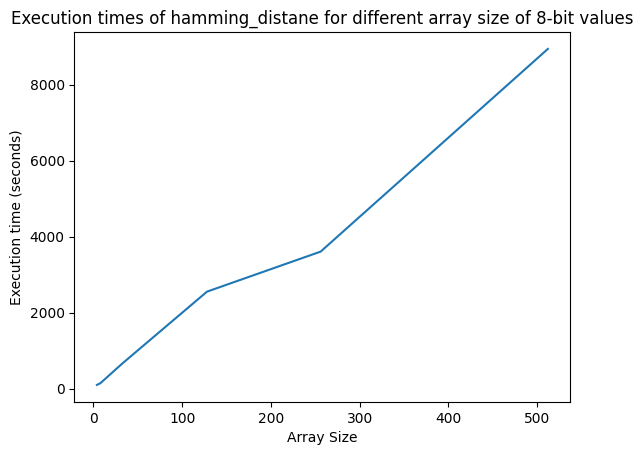

In [7]:
import matplotlib.pyplot as plt

# create a line chart
plt.plot(list(stats_8.keys()), list(stats_8.values()))

# add labels and title
plt.xlabel('Array Size')
plt.ylabel('Execution time (seconds)')
plt.title('Execution times of hamming_distane for different array size of 8-bit values')

# show the plot
plt.show()

In [ ]:
from datetime import datetime

stats_1 = {}
cases = [4, 8, 16, 32, 64, 128, 256, 512, 1024, 1536]
for case in cases:
    print(f'[{datetime.now().time().strftime("%H:%M:%S")}]: Hamming distance for {case}')
    hd = HammingDistance(case, 1)
    t = hd.test()
    stats_1[case] = t
    print(f'[{datetime.now().time().strftime("%H:%M:%S")}]: Hamming distance for {case} took {t} seconds')

[13:51:10]: Hamming distance for 512


KeySetCache: miss, regenerating .keys/17241793296454399185/0_0


[16:36:37]: Hamming distance for 512 took 9926.360323667526 seconds
[16:36:37]: Hamming distance for 1024


## After exeucting we got the following results

In [12]:
stats_1 = {
    4: 1.41,
    8: 1.65,
    16: 3.67,
    32: 9.87,
    64: 18.740,
    128: 136,
    256: 766,
}


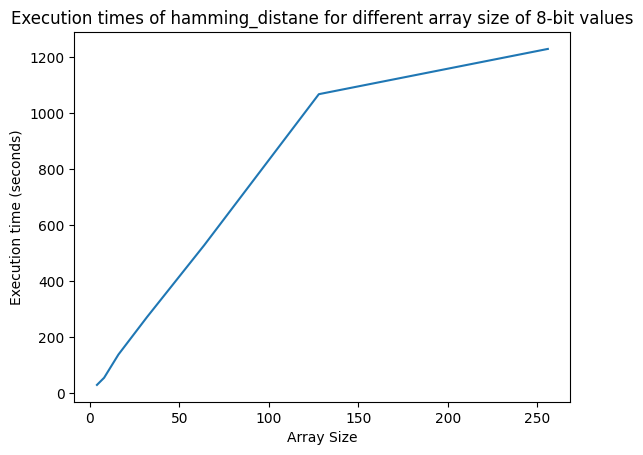

In [13]:
import matplotlib.pyplot as plt

# create a line chart
plt.plot(list(stats.keys()), list(stats.values()))

# add labels and title
plt.xlabel('Array Size')
plt.ylabel('Execution time (seconds)')
plt.title('Execution times of hamming_distane for different array size of 8-bit values')

# show the plot
plt.show()

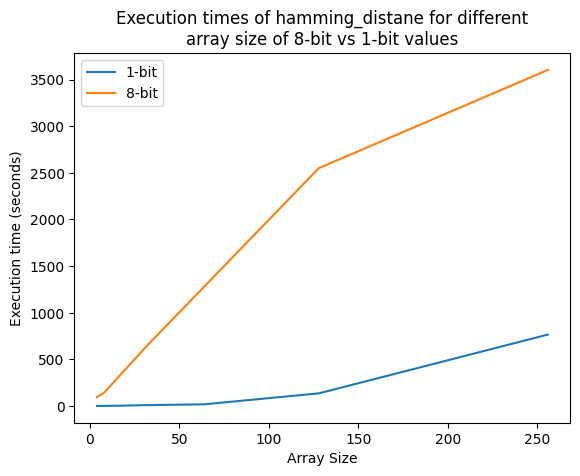

In [17]:
import matplotlib.pyplot as plt

# create a line chart
plt.plot(list(stats_1.keys()), list(stats_1.values()))
plt.plot(list(stats_8.keys()), list(stats_8.values()))


# add labels and title
plt.xlabel('Array Size')
plt.ylabel('Execution time (seconds)')
plt.title('Execution times of hamming_distane for different\narray size of 8-bit vs 1-bit values')
plt.legend(['1-bit', '8-bit'], loc='upper left')

# show the plot
plt.show()